## Чтение из файлов и рисование траекторий и границы

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import astra_io as astra

rays, max_N_traj = astra.read_trajectories2("data/traj_40033_150.dat")

print("Number of traj "+ str(len(rays)))
print("Max N_traj "+ str(max_N_traj))

['R', 'Z', 'rho', 'theta', 'N_par', 'N_pol', 'P_tot', 'P_land', 'P_coll', 'vth', 'slow_1', 'out_1', 'N_traj']
Number of traj 450
Max N_traj 500


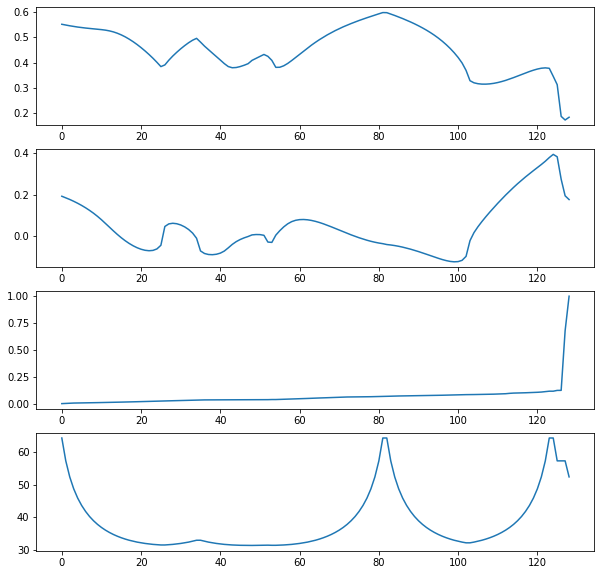

In [3]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 10))
ax1.plot(rays[1]['R'])
ax2.plot(rays[1]['Z'])
ax3.plot(rays[1]['P_tot'])
ax4.plot(rays[1]['vth'])

In [4]:
from ipywidgets import interactive

def plot_1D(index):  
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 10))
    ax1.plot(rays[index]['R'])
    ax2.plot(rays[index]['Z'])
    ax3.plot(rays[index]['P_tot'])
    ax4.plot(rays[index]['P_land'])
    plt.show()

w1d = interactive(plot_1D, index = (1, len(rays)))
w1d  

interactive(children=(IntSlider(value=225, description='index', max=450, min=1), Output()), _dom_classes=('wid…

['R(m)', 'Z(m)']


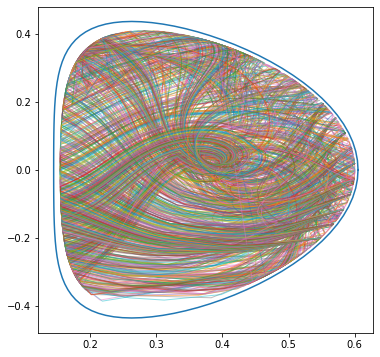

In [5]:
plt.figure(figsize=(6,6))

R, Z = astra.read_bounds("data/lcms.dat")
plt.plot(R, Z)

for ray in rays :
    plt.plot(ray['R'], ray['Z'], alpha=0.5, linewidth=1);
 
plt.show()

In [6]:
from ipywidgets import interactive

def plot_func(index, k):
    plt.figure(figsize=(6,6))
    plt.plot(R, Z)
    end_index = index+k if (index+k)<len(rays) else len(rays)
    for i in range(index, end_index):
        ray = rays[i]
        plt.plot(ray['R'], ray['Z'], alpha=1.0, linewidth=1)  
    plt.xlim(0.12, 0.62)
    plt.ylim(-0.5, 0.5)
    plt.show()
 
w = interactive(plot_func, index = (1, len(rays)), k = (1, len(rays)))
w

interactive(children=(IntSlider(value=225, description='index', max=450, min=1), IntSlider(value=225, descript…